In [ ]:
!apt-get update --fix-missing

try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

try:
    import google.colab  # noqa: F401
except ImportError:
    import pyvista as pv
else:
    !wget "https://fem-on-colab.github.io/releases/vtk-install.sh" -O "/tmp/vtk-install.sh" && bash "/tmp/vtk-install.sh"
    import pyvista as pv

# Seems that only static plotting is supported by colab at the moment
pv.global_theme.jupyter_backend = "static"
pv.global_theme.notebook = True
pv.start_xvfb()
#pv.set_jupyter_backend('trame')

**Example 1D function**

As an example we construct the PDF and CDF of the function $Y(x_1) = x^{3/2}$ on the interval $x_1 \in [0,1]$. To do so we first import

In [1]:
from PDF_Projector import *

where FEptp which stands for Finite Element physical to probability is the object we will use. To instantiate this object we can call

In [2]:
# Use the default function spaces
ptp = FEptp()

# Specify the function spaces for the CDF and PDF
ptp = FEptp(func_space_CDF = {"family":"DG","degree":1},func_space_PDF= {"family":"CG","degree":1})

Having specified the function spaces for our problem, we must then specify the phyiscal domain $\Omega_X$, the domain of the CDF and PDF $\Omega_Y$ and the number of elements we will use. This is done by calling the domain method

In [3]:
x1,y = ptp.domain(Omega_X = {'x1':(0,1)}, Omega_Y = {'Y':(0,1)}, N_elements=100)

1D mesh


/home/pmannix/Dstratify/Finite_Element/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


which returns the co-ordinates of the domain $x_1,y$. Armed with the co-ordinates we can then specify our function $Y(x_1)$ and generate the CDF & PDF by calling the fit method

In [4]:
ptp.fit(function_Y = x1**(3/2), quadrature_degree=1000)

Once fitted we can then plot these functions by calling the plot method

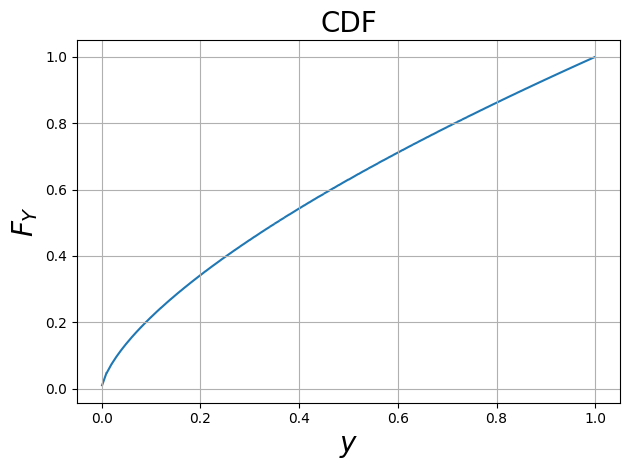

In [5]:
ptp.plot()

or evaluate them on a user specified grid y_i by calling the evaluate method as follows

In [6]:
import numpy as np
y_i = np.linspace(0,1,100)

F_Y,f_Y,y_i  = ptp.evaluate(y = y_i)

**Example of a 2D functio**

In two dimensions the method works exactly the same way and if we are happy with the function spaces chosen we can simply re-run

In [7]:
x1,x2,y = ptp.domain(Omega_X = {'x1':(0,1),'x2':(0,1)}, Omega_Y = {'Y':(0,2)}, N_elements=50)

2D mesh


/home/pmannix/Dstratify/Finite_Element/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


to generate the domain, and then call

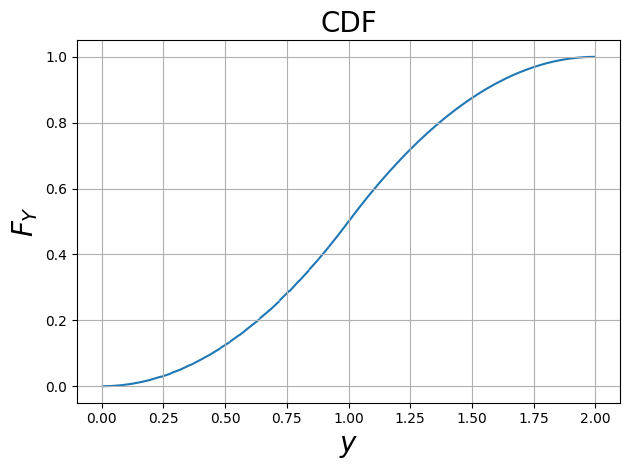

In [8]:
ptp.fit(function_Y = x1 + x2, quadrature_degree=200)

ptp.plot()

to generate and plot out the finite element approximation of the CDF and PDF of $Y(X) = x_1 + x_2$.